***Udacity ML Charity Competition***

**Problem:-**

The training data for this competition is the same as what you used to complete the project (census.csv). The columns therefore are the same as the ones you have already been working with for the classroom project.
- The 1 values in the test dataset indicate with incomes greater than 50K 
- while 0 values indicate that is not the case.

# Section 1:

**1.1: Import Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%inline matplotlib

UsageError: Line magic function `%inline` not found.


**1.1: Fetching and Uploading Dataset from Kaggle**

In [4]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"codehax41","key":"76af4ca672f76896af60d45ffbf2e34b"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle competitions download -c udacity-mlcharity-competition
!chmod 600 ~/.kaggle/kaggle.json 
!unzip \*.zip

  0% 0.00/342k [00:00<?, ?B/s]
100% 342k/342k [00:00<00:00, 82.5MB/s]
  0% 0.00/481k [00:00<?, ?B/s]
100% 481k/481k [00:00<00:00, 67.3MB/s]
  0% 0.00/388k [00:00<?, ?B/s]
100% 388k/388k [00:00<00:00, 52.5MB/s]
Archive:  census.csv.zip
  inflating: census.csv              

Archive:  test_census.csv.zip
  inflating: test_census.csv         

2 archives were successfully processed.


In [4]:
df_train = pd.read_csv('census.csv')
df_test = pd.read_csv('test_census.csv')

In [5]:
df_train.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# Section 2: Exploration

**2.1: Data Exploration**

In [6]:
n_records = df_train.shape[0]
n_greater_50k = len(df_train[df_train['income'] == '>50K'])
n_at_most_50k = len(df_train[df_train['income'] == '<=50K'])
greater_percent = 100 * n_greater_50k / n_records

print("Total number of records: ",n_records)
print("Individuals making more than $50,000: ",n_greater_50k)
print("Individuals making at most $50,000: ",n_at_most_50k)
print("Percentage of individuals making more than $50,000: ",greater_percent)

Total number of records:  45222
Individuals making more than $50,000:  11208
Individuals making at most $50,000:  34014
Percentage of individuals making more than $50,000:  24.78439697492371


## Section 3: EDA

**3.1: EDA**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D5B5998EB8>,
      dtype=object)

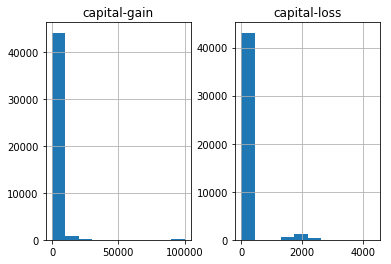

In [7]:
df_train[['capital-gain','capital-loss']].hist()

# Section 4: Feature Engineering

**4.1: Feature Engineering**

In [8]:
# Split the data into features and target label
income_raw = df_train['income']
features_raw = df_train.drop('income', axis = 1)

# Transform Skewed Continuous Features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

#Normalizing Numerical Features
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'income_raw' data to numerical values
income = income_raw.map({'<=50K': 0, '>50K':1})

# Print the final features
features_final.head(5)

C:\Users\codehax41\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


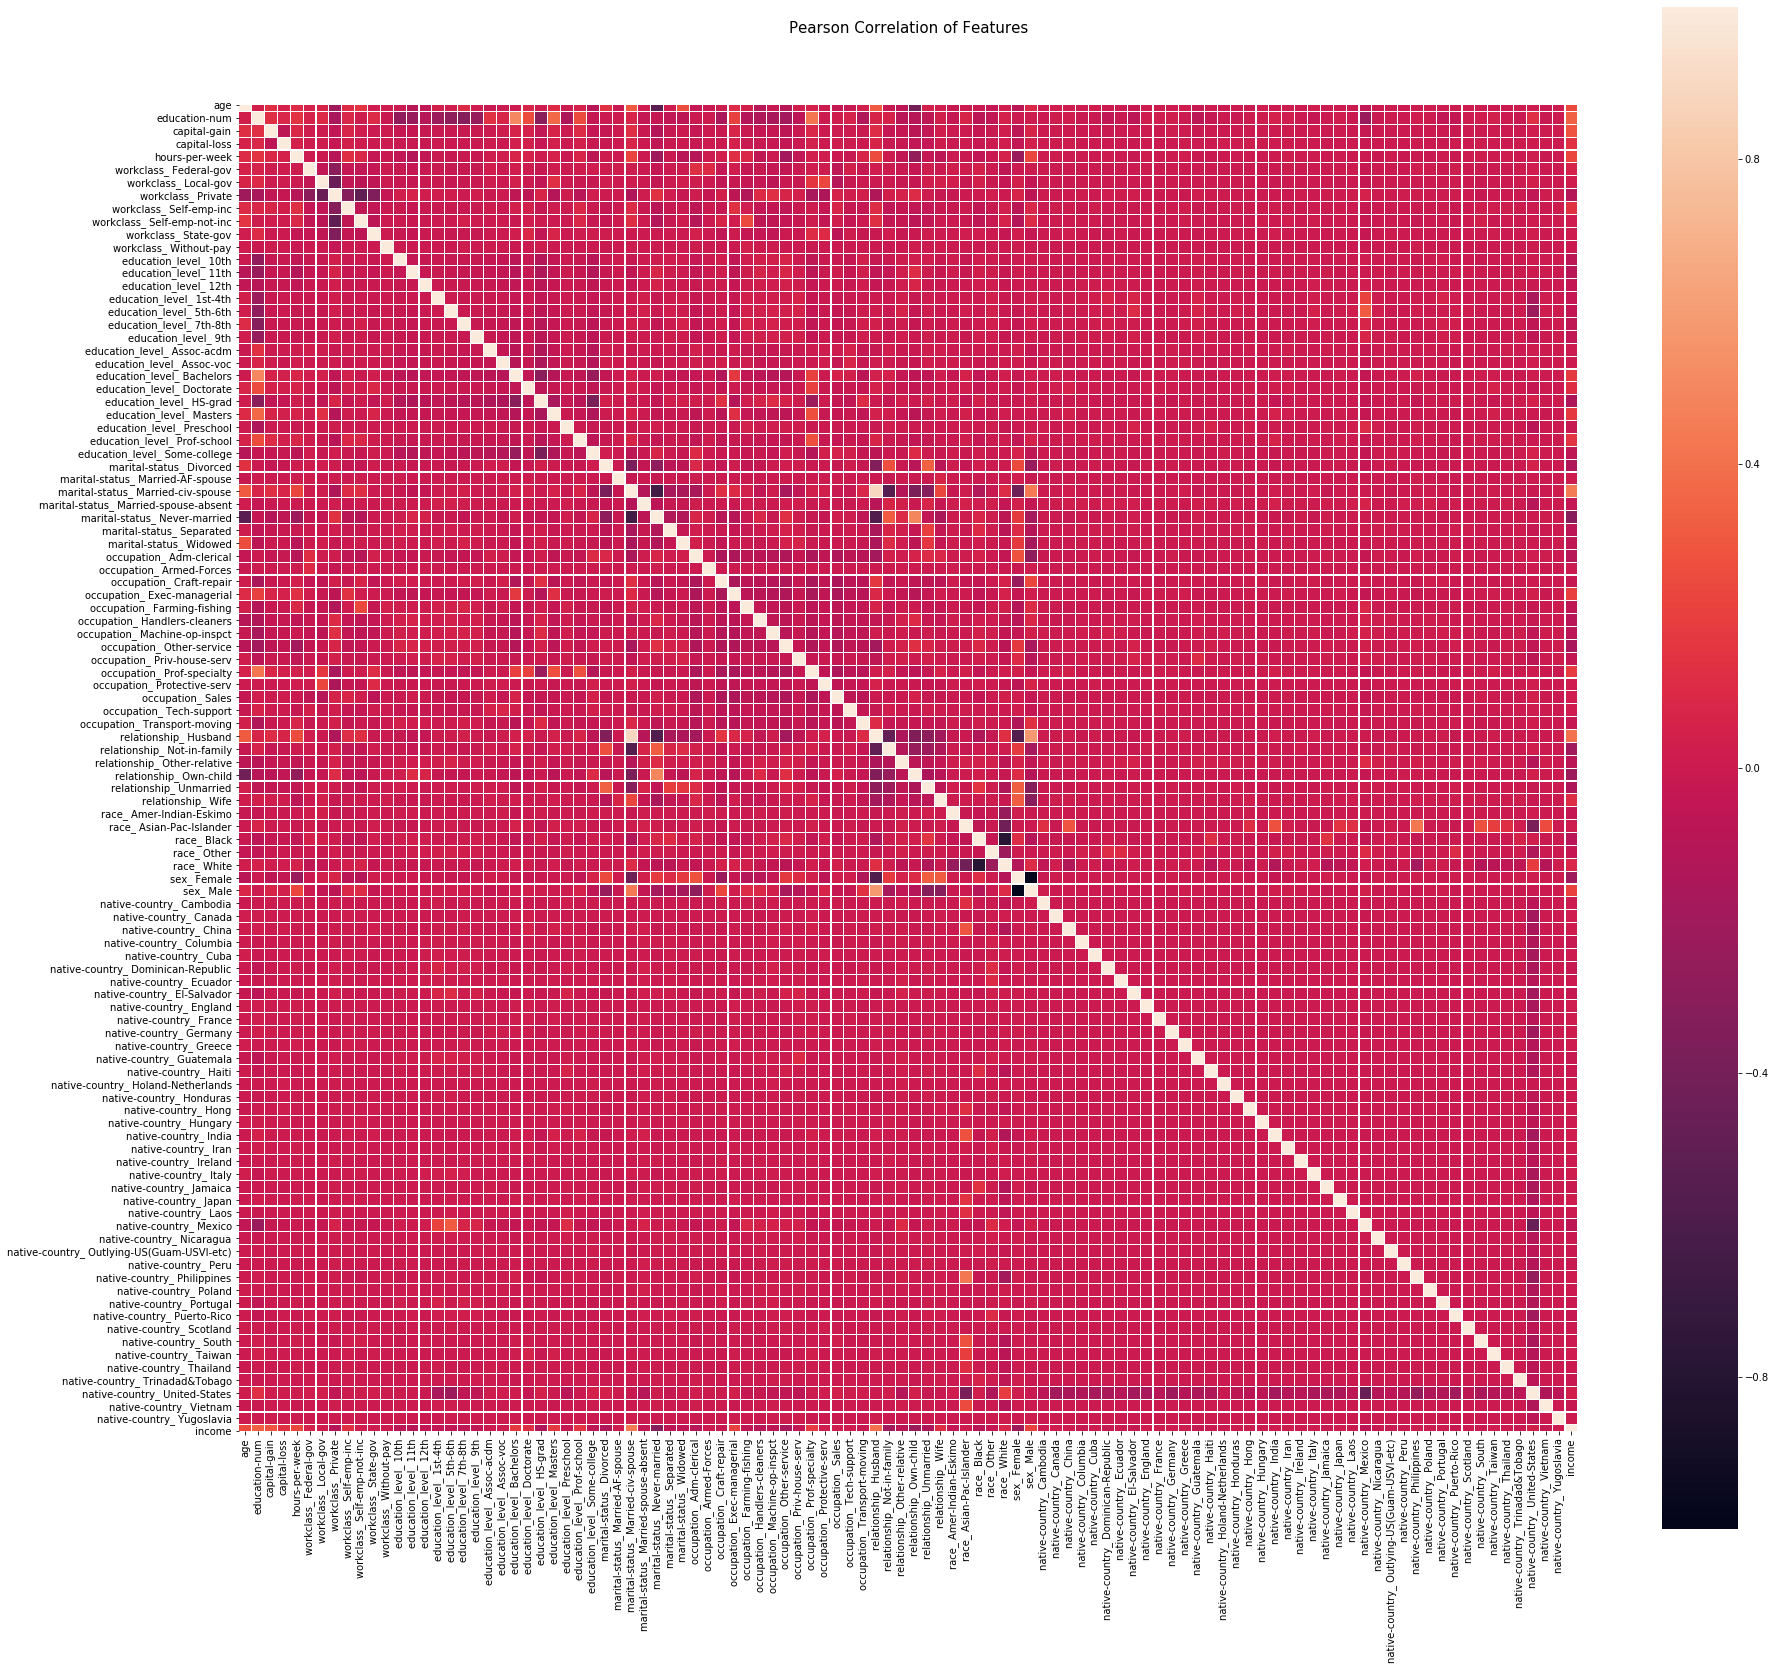

In [15]:
# check correlation between features: 
import seaborn as sns
data = pd.concat([features_final, income], axis =1)
plt.figure(figsize=(30,28))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white')

# Section 5: Modelling

**5.1: Shuffle and Split Data**

In [9]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size = 0.2, random_state = 21)

# Show the results of the split
print("Training set has {} samples",X_train.shape[0])
print("Testing set has {} samples.",X_test.shape[0])

Training set has {} samples 36177
Testing set has {} samples. 9045


In [10]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [11]:
# Initialize the classifier
clf = AdaBoostClassifier(random_state=42)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [200, 300, 500, 600]}

# Make an roc_auc scoring object using make_scorer()
scorer = make_scorer(roc_auc_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=5)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

print("best_estimator", grid_fit.best_estimator_)
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("Area under curve on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final Area under curve on  the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))

best_estimator AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=600, random_state=42)
Unoptimized model
------
Accuracy score on testing data: 0.8545
Area under curve on testing data: 0.7678

Optimized Model
------
Final accuracy score on the testing data: 0.8632
Final Area under curve on  the testing data: 0.7884


# Section 6: Testing the Model on Test Dataset

In [12]:
from sklearn.preprocessing import MinMaxScaler
# Replace all NaNs with forwardfilling
for row in df_test:
    df_test[row].fillna(method='ffill', axis=0, inplace=True)
# Transform Skewed Continuous Features
skewed = ['capital-gain', 'capital-loss']
features_test_log_transformed = pd.DataFrame(data = df_test)
features_test_log_transformed[skewed] = features_test_log_transformed[skewed].apply(lambda x: np.log(x + 1))
#Normalizing Numerical Features
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_test_log_minmax_transform = pd.DataFrame(data = features_test_log_transformed)
features_test_log_minmax_transform[numerical] = scaler.fit_transform(features_test_log_transformed[numerical])

# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_test_encoded = pd.get_dummies(features_test_log_minmax_transform)

# Remove the first column
features_test_final = features_test_encoded.drop('Unnamed: 0',1)

In [13]:
# Make predictions using features_test_final and store it a new coulmn in test dataset
df_test['id'] = df_test.iloc[:,0]
df_test['income'] = best_clf.predict_proba(features_test_final)[:,1]
df_test.head()

,Unnamed: 0,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,id,income
0,0,0.054795,Private,10th,0.333333,Married-civ-spouse,Craft-repair,Husband,White,Male,0.000000,0.0,0.397959,United-States,0,0.498028
1,1,0.438356,Private,Bachelors,0.800000,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.000000,0.0,0.397959,United-States,1,0.500401
2,2,0.369863,Self-emp-not-inc,Assoc-acdm,0.733333,Married-civ-spouse,Other-service,Wife,White,Female,0.000000,0.0,1.000000,United-States,2,0.499865
3,3,0.232877,Private,Bachelors,0.800000,Married-civ-spouse,Sales,Husband,White,Male,0.772653,0.0,0.459184,United-States,3,0.503416
4,4,0.095890,Private,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,4,0.498845


In [14]:
# write output file
df_test[['id', 'income']].to_csv("submission.csv", index=False)

In [0]:
!kill -9 -1